<a href="https://colab.research.google.com/github/rushilg13/Leaf-Identifier-Using-Fast.ai/blob/master/Leaf_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0" #restart runtime after its done executing only if asked for.

     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 4.0MB 45.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
from fastai.vision import *

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive
path=Path('leaf_Identify/train') #set your path based on where you store.

/content/gdrive/My Drive


In [ ]:
!ls {path} #printing list of files/folder in the path

Aloe  Bhringraj  Catnip     Curry_Leaves  Lemongrass  Neem  Tulsi
Bay   Brahmi	 Coriander  Fennel	  Mint	      Sage


In [ ]:
classes = ['Aloe', 'Bhringraj', 'Catnip', 'Curry_Leaves', 'Lemongrass', 'Neem', 'Tulsi', 'Bay', 'Brahmi', 'Coriander', 'Fennel', 'Mint', 'Sage'] ##Classification problem 

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500 )

Aloe


Bhringraj


Catnip


Curry_Leaves


Lemongrass


Neem


Tulsi


Bay


Brahmi


Coriander


Fennel


Mint


Sage


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats) #Go to PPT

In [ ]:
data.classes

['Aloe',
 'Bay',
 'Bhringraj',
 'Brahmi',
 'Catnip',
 'Coriander',
 'Curry_Leaves',
 'Fennel',
 'Lemongrass',
 'Mint',
 'Neem',
 'Sage',
 'Tulsi']

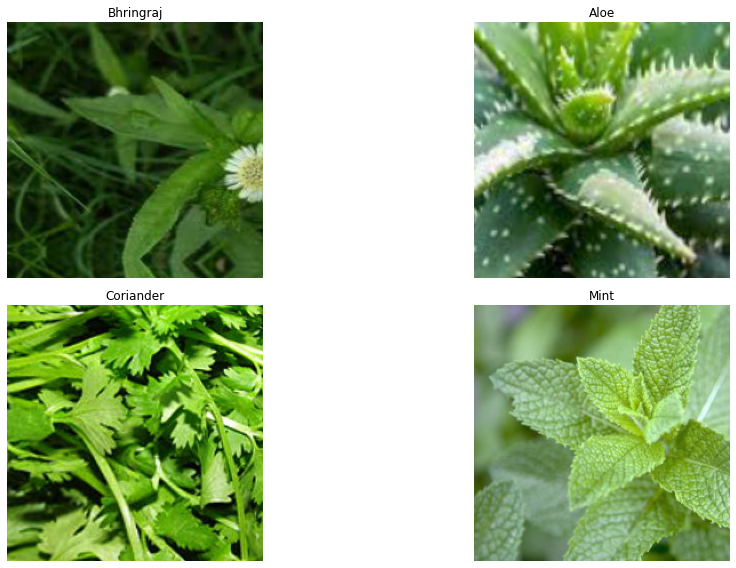

In [ ]:
data.show_batch(rows=2, figsize=(16,8))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate) #CNN:  Convolution neural net

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10) 

epoch,train_loss,valid_loss,error_rate,time
0,3.863633,3.551517,0.960000,00:50
1,3.721225,2.890822,1.000000,00:49
2,3.306249,2.705892,0.720000,00:47
3,2.700879,2.843033,0.680000,00:48
4,2.225646,2.798212,0.640000,00:48
5,1.867373,2.686996,0.600000,00:48
6,1.612039,2.545195,0.600000,00:59
7,1.415654,2.366103,0.600000,00:51
8,1.251898,2.248552,0.480000,00:49
9,1.124591,2.135515,0.480000,00:49


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

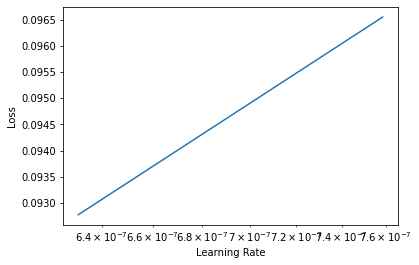

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(6.4*10**-7,6.6*10**-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.122417,2.030147,0.440000,00:50
1,0.100611,1.972573,0.400000,00:49
2,0.084616,1.928696,0.400000,00:49
3,0.080762,1.898655,0.400000,00:50
4,0.071667,1.858409,0.400000,00:49
5,0.070357,1.846797,0.400000,00:52
6,0.073168,1.814605,0.400000,00:52
7,0.068247,1.792422,0.400000,00:56
8,0.066561,1.777343,0.400000,00:49
9,0.072645,1.743128,0.400000,00:50


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

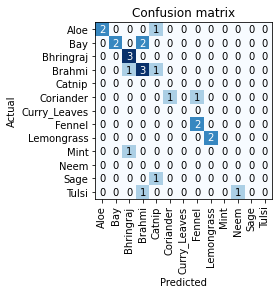

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import ClassConfusion

In [ ]:
ClassConfusion(interp,classes)

Please enter a value for `k`, or the top images you will see: 1


100%|██████████| 9/9 [00:03<00:00,  2.93it/s]


<Figure size 432x288 with 0 Axes>

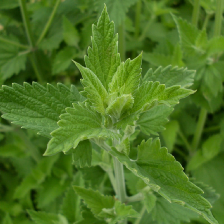

In [ ]:
path=Path('leaf_Identify/test')
img = open_image(path/'catnip-2.jpg')
img.resize(torch.Size([img.shape[0],224,224]))

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Catnip'